In [8]:
import sys
sys.path.insert(0,'../python/')
from OpticalPhoton import *
from PTFEScatter import scatter_on_ptfe
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import json

def plot_scatter(medium):
    """
    Plot reflectivity as a function of incident angle for GXe/LXe to PTFE
    
    Input
    -------
    medium - LXe or GXe
    
    """
    
    theta = np.linspace(0.,np.pi/2,100)
    r_tot, r_diff_lobe, r_spec_lobe, r_spec_spike = scatter_on_ptfe(theta,medium)
    theta_deg = theta*180/np.pi
    plt.plot(theta_deg,r_tot,label='Total reflection', color='black')
    plt.plot(theta_deg,r_diff_lobe, label='Diffuse lobe')
    plt.plot(theta_deg,r_spec_lobe, label='Specular lobe')
    plt.plot(theta_deg,r_spec_spike, label='Specular spike')
    plt.xlabel('$\\theta$ (deg)')
    plt.ylabel('Reflectivity')
    plt.ylim([0,1])
    plt.title(medium+" to Teflon")
    plt.legend()

### Implementation of 175nm UV light scattering from GXe/LXe to PTFE

Data from Fig5.24 (GXe) Fig7.5 (LXe) of PhD thesis: 
https://www-eng.lbl.gov/~shuman/NEXT/MATERIALS&COMPONENTS/MISC/PTFE-Reflectance-ThesisCoimbra.pdf

#### Scatter from GXe on PTFE

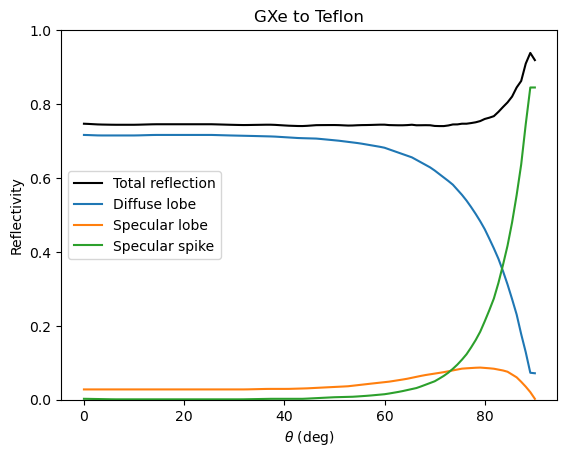

In [9]:
plot_scatter('GXe')

#### Scatter from LXe on PTFE

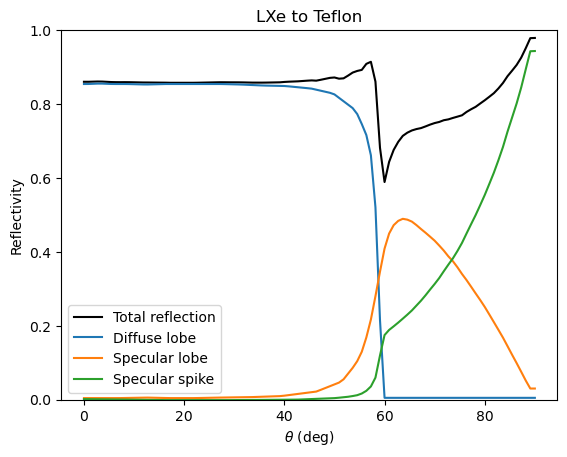

In [7]:
plot_scatter('LXe')